<a href="https://colab.research.google.com/github/EgorMatveev26/Datasets/blob/main/%D0%9B%D0%A0_2_1_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

# Загрузка данных
Используемый набор данных содержит информацию о пациентах, включая их характеристики такие как, возраст, пол, имеющееся количество детей, регион проживания и другие. Каждая строка представляет отдельного пациента, а столбцы содержат следующие переменные:
- **Age**: Возраст пациента
- **Sex**: Пол пациента (мужской/женский)
- **BMI**: Индекс массы тела пациента
- **Children**: Количество детей у пациента
- **Smoker**: Курит ли пациент (да/нет)
- **Region**: Регион проживания пациента
- **Charges**: Суммарные медицинские расходы пациента

URL-адрес набора данных:

https://raw.githubusercontent.com/EgorMatveev26/Datasets/refs/heads/main/insurance.csv

In [33]:
# Присвоим переменной «url» ссылку на датасет:
url = 'https://raw.githubusercontent.com/EgorMatveev26/Datasets/refs/heads/main/insurance.csv'
# Создаем лист с названием столбцов:
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
# Используем Pandas read_csv():
dataset = pd.read_csv(url, names = cols)

# Подготовка и анализ данных

In [34]:
# Размер датасета: 1338 записей(строк), 7 столбцов
dataset.shape

(1338, 7)

In [35]:
# Отображаем первые 10 строк датасета
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [36]:
# Проверка на отсутствующие значения
print(dataset.isnull().sum())
# Удаление строк с пропущенными значениями, если они есть
dataset.dropna(inplace=True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [37]:
# Метод Pandas info()  выводит информацию о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
# Заменяем бинарные переменные на 0 и 1
dataset = dataset.replace('female', 0).replace('male', 1).replace('no', 0).replace('yes', 1)
# Заменяем категориальные переменные
dataset["region"] = dataset["region"].astype('category')

<ipython-input-38-ee0bec6f9e8a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace('female', 0).replace('male', 1).replace('no', 0).replace('yes', 1)


In [39]:
# Проверим, что столбцы object отсутствуют
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   int64   
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   int64   
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(4)
memory usage: 64.3 KB


In [40]:
# Посмотрим на датасет, готовый к работе
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [41]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений
dataset.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [42]:
dataset['smoker'].unique()

array([1, 0])

In [43]:
# Теперь проверим количество строк, которое принадлежит каждому классу
dataset['smoker'].value_counts()

,count
smoker,
0,1064
1,274


Видим, что набор данных несбалансированный. Далее будем балансировать его.

# Визуализация данных

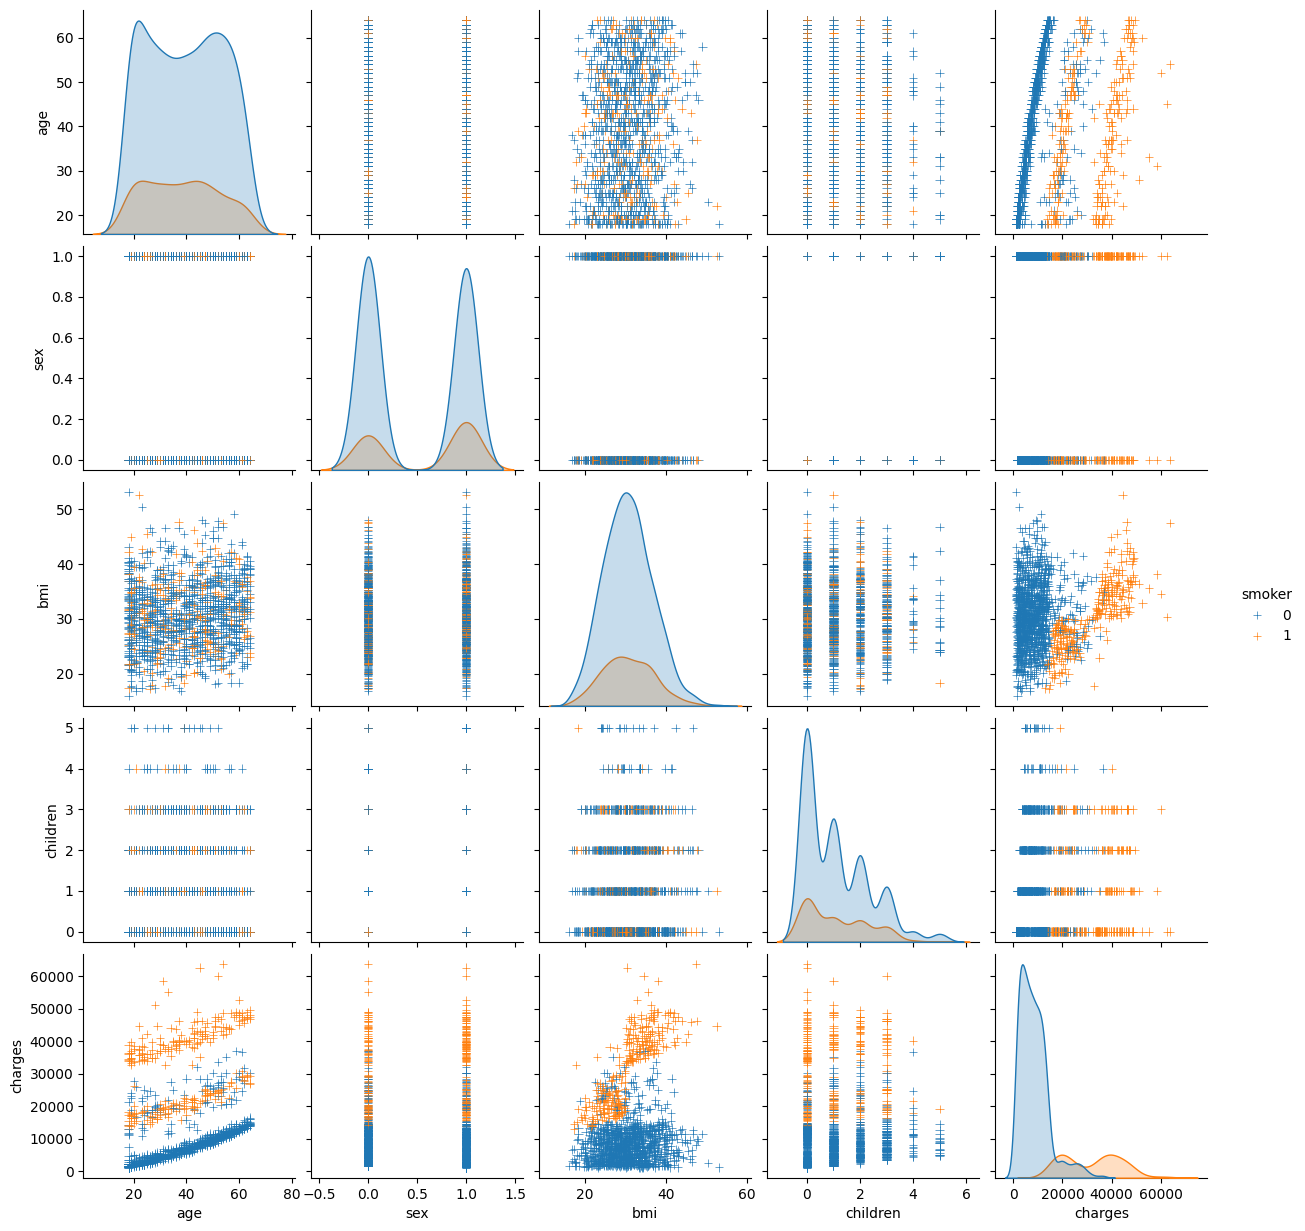

In [44]:
# Строим парный график, показывающий отношения между колонками в наборе данных с помощью pairplot
sns.pairplot(dataset, hue='smoker', markers='+')
plt.show()

In [45]:
# Создадим новый датасет без столбцов 'category'
dataset_new = dataset.select_dtypes(exclude=['category'])
dataset_new.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
charges,float64


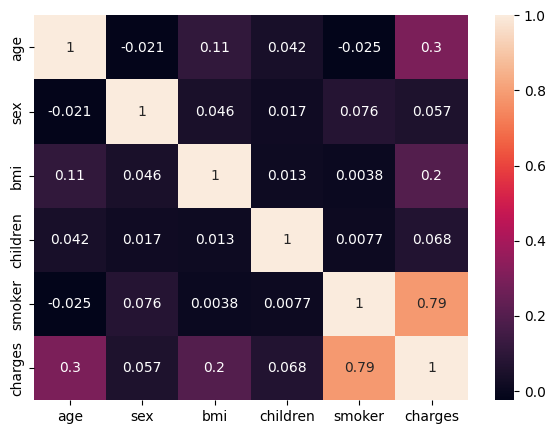

In [46]:
# Строим тепловую карту для проверки корреляции
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

Видим, что charges(суммарные медицинские расходы пациента) и smoker(наличие привычки курения у пациента) показывают высокую корреляцию, значит пациенты, которые курят, имеют более высокие медицинские расходы.

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих столбцов. В нашем случае это столбец smoker.

В X складываем весь набор данных без целевой переменной.

In [47]:
X = dataset_new.drop(['smoker'], axis=1)
y = dataset_new['smoker']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1338, 5) | y shape: (1338,) 


X имеет 1338 строк и 5 столбцов, тогда как Y имеет 1338 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [49]:
# Выполняем балансировку классов с помощью SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [50]:
# Создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# Оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.980445 (0.011257)
LDA: 0.971569 (0.016047)
KNN: 0.940163 (0.012554)
CART: 0.973341 (0.013559)
NB: 0.901673 (0.019054)
SVC: 0.645161 (0.023944)


LR показал лучшие метрики среди всех алгоритмов.
Далее работаем с LR.

Давайте обучим модель логистической регрессии на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Выполняем нормализацию данных.
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [51]:
# Нормализация данных
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_resampled)
scaled_x_test = scaler.transform(X_test)

# Создадим модель логистической регрессии
model = LogisticRegression()

# Обучим нашу модель
model.fit(scaled_x_train, y_resampled)

# Выполним предсказание класса на оставшихся 20% данных - тестовой выборке
y_pred = model.predict(scaled_x_test)

# Отобразим коэффициенты модели
print('Модель логистической регрессии (коэффициенты и свободные члены): ', model.coef_, model.intercept_, end='\n\n' )

Модель логистической регрессии (коэффициенты и свободные члены):  [[-1.35390385 -0.06449454 -2.33513748 -0.40529589  6.19553831]] [-0.43228136]



## Визуализация решения

Confusion Matrix Array: 
     0    1
0  48    0
1  12  208

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       220
           1       0.80      1.00      0.89        48

    accuracy                           0.96       268
   macro avg       0.90      0.97      0.93       268
weighted avg       0.96      0.96      0.96       268



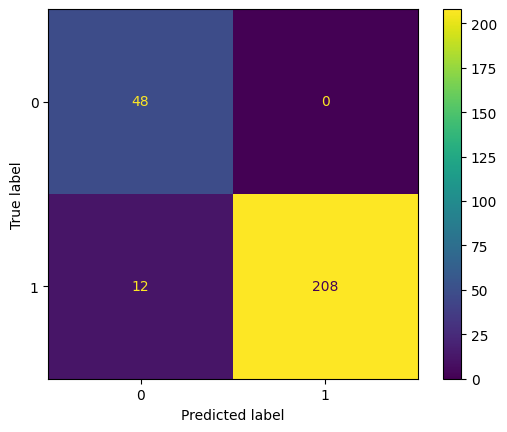

In [52]:
#Confusion Matrix Array
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
model_matrix_df = pd.DataFrame(model_matrix)
print('Confusion Matrix Array: \n',model_matrix_df, end='\n\n')

#Confusion Matrix Plot
ds = ConfusionMatrixDisplay(confusion_matrix = model_matrix)
ds.plot()

#Classification Report
print('Classification Report: \n',classification_report(y_test, y_pred))

Модель показывает высокую точность (accuracy) 96%. Модель хорошо работает с классом 0 (все объекты распознаны правильно) и неплохо с классом 1 (208 из 220 объектов распознаны правильно).